<a href="https://colab.research.google.com/github/james-lucius/qureca_ADEQUATE/blob/main/M6_521_05_qubo_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://gitlab.com/qworld/qeducation/educational-materials/adequate-qbook1/raw/main/qworld/images/adq_1.png" align="left" width=450></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

_prepared by Özlem Salehi_

<font size="28px" style="font-size:28px;" align="left"><b>Exercises: QUBO</b></font>


Run the following cell to perform necessary installations:

In [1]:
try:
  import qiskit, qiskit_aer, qiskit_optimization, networkx
  print("Qiskit has been imported ")
except:
  print("Installing Qiskit...")
  !pip install -U -q qiskit[visualization]
  !pip install -U -q qiskit-aer
  !pip install -U -q qiskit_optimization
  !pip install -U -q networkx
  print("Qiskit has been installed")

Installing Qiskit...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.5/646.5 kB 34.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 21.5 MB/s eta 0:00:00
Qiskit has been installed


### Task 1


Find out what assignment of $x_1,x_2,x_3,x_4$ minimizes the following objective function

$$f(x_1, x_2, x_3, x_4) = - 5x_1 - 3x_2 - 8x_3 - 6x_4 + 4x_1 x_2 + 8x_1 x_3 + 2x_2 x_3 + 10x_3 x_4.$$

Write a function to compute $f(x_1, x_2, x_3, x_4)$ for different  assignments to $x_1$ and $x_2$ and use this function to find the lowest value of the function.

In [2]:
def calc_energy(x_1, x_2, x_3, x_4):
    #your code here
    return (-5 * x_1) + (-3 * x_2) + (-8 * x_3) + (-6 * x_4) + (4 * x_1 * x_2) + (8 * x_1 * x_3) + (2 * x_2 * x_3) + (10 * x_3 * x_4)

In [3]:
from itertools import product
configurations = list(product([0,1], repeat = 4))

#Your code here
conf_dict = {}
lowest_e = 1000
ground_state = []
for c in configurations:
  e = calc_energy(c[0], c[1], c[2], c[3])
  print(f"Energy for assignment {c}: {e}")
  if e < lowest_e:
    lowest_e = e
    ground_state = c
print(f"Ground_state: {ground_state}")
print(f"Lowest energy: {lowest_e}")

Energy for assignment (0, 0, 0, 0): 0
Energy for assignment (0, 0, 0, 1): -6
Energy for assignment (0, 0, 1, 0): -8
Energy for assignment (0, 0, 1, 1): -4
Energy for assignment (0, 1, 0, 0): -3
Energy for assignment (0, 1, 0, 1): -9
Energy for assignment (0, 1, 1, 0): -9
Energy for assignment (0, 1, 1, 1): -5
Energy for assignment (1, 0, 0, 0): -5
Energy for assignment (1, 0, 0, 1): -11
Energy for assignment (1, 0, 1, 0): -5
Energy for assignment (1, 0, 1, 1): -1
Energy for assignment (1, 1, 0, 0): -4
Energy for assignment (1, 1, 0, 1): -10
Energy for assignment (1, 1, 1, 0): -2
Energy for assignment (1, 1, 1, 1): 2
Ground_state: (1, 0, 0, 1)
Lowest energy: -11


### Solution

In [4]:
def calc_energy(x_1, x_2, x_3, x_4):
    return -5*x_1-3*x_2-8*x_3-6*x_4+4*x_1*x_2+8*x_1*x_3+2*x_2*x_3+10*x_3*x_4

In [5]:
from itertools import product
configurations = list(product([0,1], repeat = 4))

conf_dict = {}
lowest_e = 1000
ground_state = []
for x in configurations:
    e = calc_energy(x[0],x[1],x[2], x[3])
    print("Energy for assignment",x,": ", e)
    if e < lowest_e:
        lowest_e = e
        ground_state = x
print("Ground state: ", ground_state)
print("Lowest value: ", lowest_e)

Energy for assignment (0, 0, 0, 0) :  0
Energy for assignment (0, 0, 0, 1) :  -6
Energy for assignment (0, 0, 1, 0) :  -8
Energy for assignment (0, 0, 1, 1) :  -4
Energy for assignment (0, 1, 0, 0) :  -3
Energy for assignment (0, 1, 0, 1) :  -9
Energy for assignment (0, 1, 1, 0) :  -9
Energy for assignment (0, 1, 1, 1) :  -5
Energy for assignment (1, 0, 0, 0) :  -5
Energy for assignment (1, 0, 0, 1) :  -11
Energy for assignment (1, 0, 1, 0) :  -5
Energy for assignment (1, 0, 1, 1) :  -1
Energy for assignment (1, 1, 0, 0) :  -4
Energy for assignment (1, 1, 0, 1) :  -10
Energy for assignment (1, 1, 1, 0) :  -2
Energy for assignment (1, 1, 1, 1) :  2
Ground state:  (1, 0, 0, 1)
Lowest value:  -11


### Task 2

Convert the following QUBO formulation into Ising formulation:

$$f (x_1, x_2) = 5x_1 + 7x_1 x_2 - 3x_2.$$

### Solution

We replace each occurence of $x_1$ with $\frac{1+s_1}{2}$ and $x_2$ with $\frac{1+s_2}{2}$.




\begin{align*}
5\frac{(1+s_1)}{2} + 7\frac{(1+s_1)}{2}\frac{(1+s_2)}{2} - 3 \frac{(1+s_2)}{2}
&= \frac{(5+5s_1)}{2} + \frac{(7+7s_1+7s_2+7s_1s_2)}{4} +  \frac{(-3-3s_2)}{2} \\
&= \frac{17}{4}s_1 + \frac{1}{4}s_2 + \frac{7}{4}s_1s_2 + \frac{11}{4}
\end{align*}

### Task 3

In Qiskit, one can create quadratic programs and convert them to QUBO as follows.

In [6]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo

mod = QuadraticProgram("my problem")

mod.binary_var(name="x1")
mod.binary_var(name="x2")

mod.minimize(constant=0, linear={"x1": 5, "x2": -3}, quadratic={("x1", "x2"): 7})
conv = QuadraticProgramToQubo()
qubo = conv.convert(mod)

# Your code here
ising, x = qubo.to_ising()
print(ising, x)

SparsePauliOp(['IZ', 'ZI', 'ZZ'],
              coeffs=[-4.25+0.j, -0.25+0.j,  1.75+0.j]) 2.75


Use `to_ising()` function of QUBO to obtain the corresponding Ising model and compare your result with Task 3.


### Solution

In [7]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo

mod = QuadraticProgram("my problem")

mod.binary_var(name="x1")
mod.binary_var(name="x2")

mod.minimize(constant=0, linear={"x1": 5, "x2": -3}, quadratic={("x1", "x2"): 7})
conv = QuadraticProgramToQubo()
qubo = conv.convert(mod)

ising, x = qubo.to_ising()
print(ising, x)

SparsePauliOp(['IZ', 'ZI', 'ZZ'],
              coeffs=[-4.25+0.j, -0.25+0.j,  1.75+0.j]) 2.75


### Task 4

Suppose that we want to minimize the following function:

$$2x_1x_2 - x_1 + 3$$

such that the constraint $x_1 + x_2 = 1$ is satisfied.

In Qiskit, you don't need to worry about the penalty method. Constraints are automatically converted for you. You can also provide a `penalty` parameter to the converter.


In [8]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo

mod = QuadraticProgram("my problem")

mod.binary_var(name="x1")
mod.binary_var(name="x2")

mod.minimize(constant=3, linear={"x1": 1}, quadratic={("x1", "x2"): 2})
mod.linear_constraint(linear={"x1": 1, "x2": 1}, sense="==", rhs=1, name="c1")

conv = QuadraticProgramToQubo(penalty = 4)
qubo = conv.convert(mod)
print(qubo)
ising, x = qubo.to_ising()
print(ising, x)


minimize 4*x1^2 + 10*x1*x2 + 4*x2^2 - 7*x1 - 8*x2 + 7 (2 variables, 0 constraints, 'my problem')
SparsePauliOp(['IZ', 'ZI', 'ZZ'],
              coeffs=[-1. +0.j, -0.5+0.j,  2.5+0.j]) 6.0


For the graph given below, create the QUBO formulation. Set penalty as 40. Then obtain the corresponding Ising model.

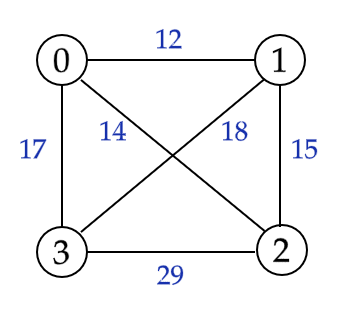

In [9]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
import numpy as np

# Weight matrix
W = np.array([[0,12,14,17],
             [12,0,15,18],
             [14,15,0,29],
             [17,18,29,0]])

#Create the problem
tsp = QuadraticProgram("my problem")
N = 4
#Create the binary variables
for i in range(N):
  for j in range(N):
    tsp.binary_var(name=f"x_{i}_{j}")


In [10]:
# Add the constraints
for i in range(N):
  linear_dict = {f"x_{i}_{j}": 1 for j in range(N)}
  tsp.linear_constraint(linear = linear_dict, sense = "==", rhs = 1, name = f"cons1_{i}")
for t in range(N):
  linear_dict = {f"x_{i}_{j}": 1 for i in range(N)}
  tsp.linear_constraint(linear = linear_dict, sense = "==", rhs = 1, name = f"cons2_{t}")

In [11]:
# Add the cost function
quadratic_dict = {}
for i in range(N):
  for j in range(N):
    if i!= j:
      for t in range(N - 1):
        quadratic_dict[(f"x_{i}_{t}", f"x_{j}_{t+1}")]  = W[i][j]
      quadratic_dict[(f"x_{i}_{N-1}", f"x_{j}_{0}")]  = W[i][j]
tsp.minimize(quadratic=quadratic_dict)
conv = QuadraticProgramToQubo(penalty = 40)
tsp_qubo = conv.convert(tsp)
tsp_ising, x = tsp_qubo.to_ising()

### Solution

In [12]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
import numpy as np

# Weight matrix
W = np.array([[0,12,14,17],
             [12,0,15,18],
             [14,15,0,29],
             [17,18,29,0]])

#Create the problem
tsp = QuadraticProgram("my problem")
N = 4
#Create the binary variables
for i in range(N):
  for j in range(N):
    tsp.binary_var(name=f"x_{i}_{j}")


In [13]:
# Add the constraints

for i in range(N):
  linear_dict = {f"x_{i}_{j}":1 for j in range(N)}
  tsp.linear_constraint(linear=linear_dict, sense="==", rhs=1, name=f"cons1_{i}")
for t in range(N):
  linear_dict = {f"x_{i}_{t}":1 for i in range(N)}
  tsp.linear_constraint(linear=linear_dict, sense="==", rhs=1, name=f"cons2_{t}")

In [14]:
# Add the cost function

quadratic_dict = {}
for i in range(N):
  for j in range(N):
    if i!= j:
      for t in range(N - 1):
        quadratic_dict[(f"x_{i}_{t}", f"x_{j}_{t+1}")]  = W[i][j]
      quadratic_dict[(f"x_{i}_{N-1}", f"x_{j}_{0}")]  = W[i][j]
tsp.minimize(quadratic=quadratic_dict)
conv = QuadraticProgramToQubo(penalty = 40)
tsp_qubo = conv.convert(tsp)
tsp_ising, x = tsp_qubo.to_ising()

### Task 5

Write a function that takes as input a bistring encoding a TSP problem, and the weight matrix, and returns the cost of the tour. Note that the variables are ordered as $x_{0,0}, x_{0,1}, x_{0,2},\dots,x_{N-1,N-1}$.

In [15]:
def calculate_cost(bit_string, W):
  ### Your code here
  total = 0
  index = 0
  N= len(W)
  bit_string = list(bit_string)
  for i in range(N):
    for j in range(N):
      if bit_string[index]=="1":
        total += W[i][j]
      index += 1
  return total

### Solution

In [16]:
def calculate_cost(bit_string, W):
  total = 0
  index = 0
  N= len(W)
  bit_string = list(bit_string)
  for i in range(N):
    for j in range(N):
      if bit_string[index]=="1":
        total += W[i][j]
      index += 1
  return total